In [1]:
# this data (Heart Disease) set imported form kaggle

In [2]:
#importing libraries apart form the main machine learning models
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#to get the plots inside the notebook
%matplotlib inline

In [3]:
#importing of data
df1 = pd.read_csv("heart-disease.csv.csv")
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#getting the data ready for fitting
from sklearn.model_selection import train_test_split

X = df1.drop("target", axis = 1)
y = df1["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [5]:
# import model
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report 

In [6]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)
y_preds_clf = clf.predict(X_test)

print(classification_report(y_test, y_preds_clf))

precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [7]:
kn = KNeighborsClassifier()

kn.fit(X_train, y_train)
y_preds_kn = kn.predict(X_test)

print(classification_report(y_test, y_preds_kn))

precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [8]:
lr = LogisticRegression(max_iter=10000)

lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_test)

print(classification_report(y_test, y_preds_lr))

precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [9]:
lsvc = LinearSVC(max_iter=1000)

lsvc.fit(X_train, y_train)
y_preds_lsvc = clf.predict(X_test)

print(classification_report(y_test, y_preds_lsvc))

precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Till now we have roughly evaluated our dataset to see the result of differnt Machine learning models.
For futher evaluation of the data set and tuning of hyperparameters. we need to explore and understand our dataset

## Data Exploration

In [10]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


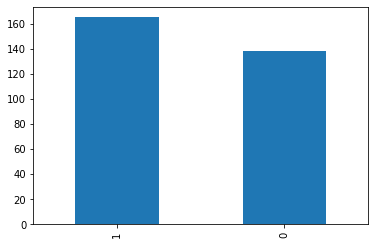

In [11]:
df1["target"].value_counts().plot.bar()

In [12]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


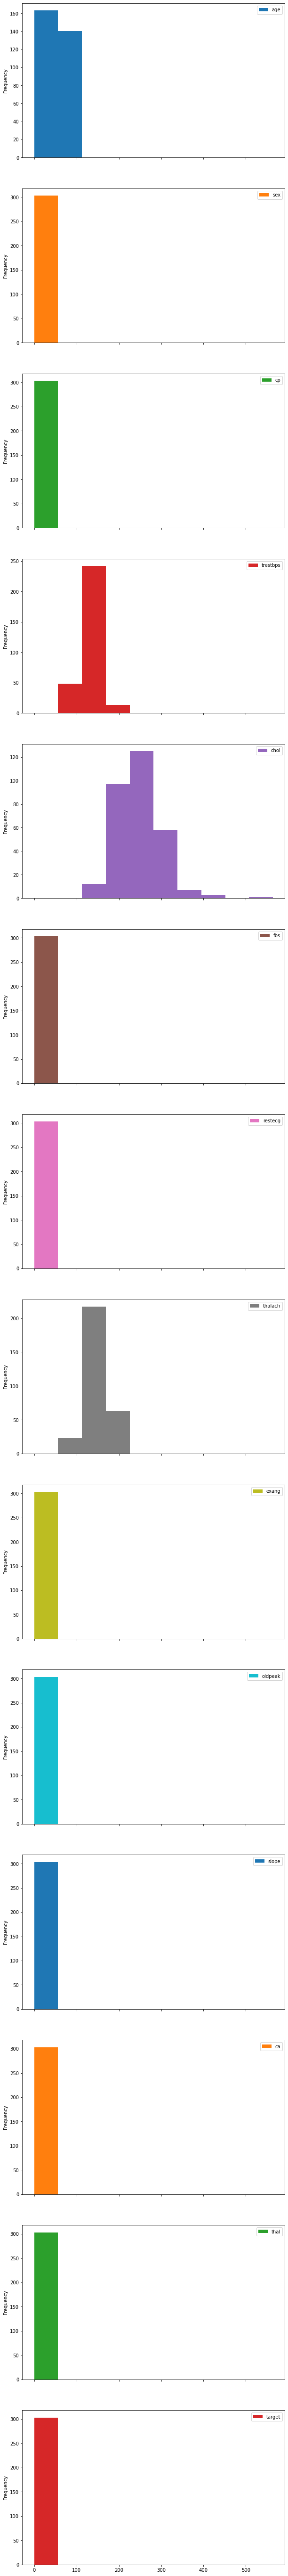

In [13]:
df1.plot.hist(subplots = True, figsize = (10, 100));
#this is useless as the X-axis is same for all so reading the graph is not possible

### Age and Heart Disease

In [14]:
pd.crosstab(df1.target, [df1.sex])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

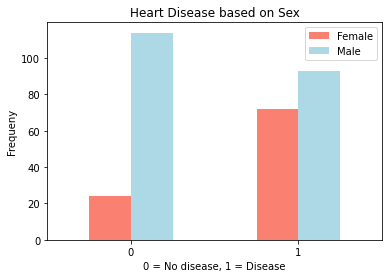

In [15]:
pd.crosstab(df1.target, [df1.sex]).plot(kind = 'bar', color = ["salmon", 'lightblue'])

plt.title("Heart Disease based on Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Frequeny")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0)

### Age vs Max heart Rate

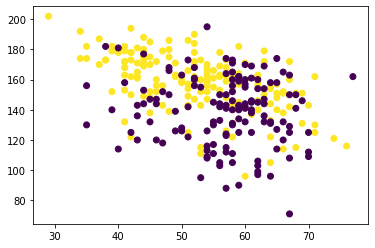

In [16]:
# method 1
plt.scatter( x = df1.age, y = df1.thalach , c = df1.target)
#In this case however we cannot mark all the legends

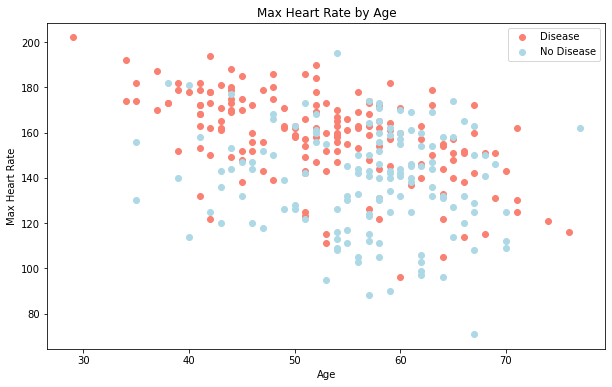

In [17]:
#Method 2

plt.figure(figsize= (10, 6))

plt.scatter( x = df1.age[df1.target == 1], 
            y = df1.thalach[df1.target == 1],
           c = "salmon");
plt.scatter( x = df1.age[df1.target == 0], 
            y = df1.thalach[df1.target == 0],
           c = "lightblue");

plt.legend(labels = ["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("Max Heart Rate by Age");

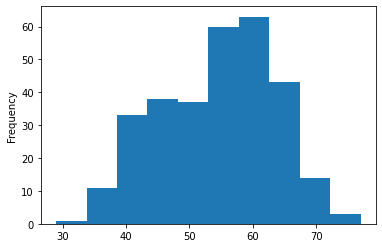

In [18]:
df1.age.plot.hist()

### Chest Pain type and Heart disease

In [19]:
pd.crosstab(df1.cp, df1.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


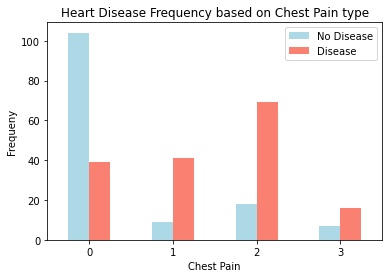

In [20]:
pd.crosstab(df1.cp, df1.target).plot(kind = 'bar', color = ['lightblue', "salmon"])

plt.title("Heart Disease Frequency based on Chest Pain type")
plt.xlabel("Chest Pain")
plt.ylabel("Frequeny")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

### Correlation Matrix

In [21]:
corr_matrix = df1.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


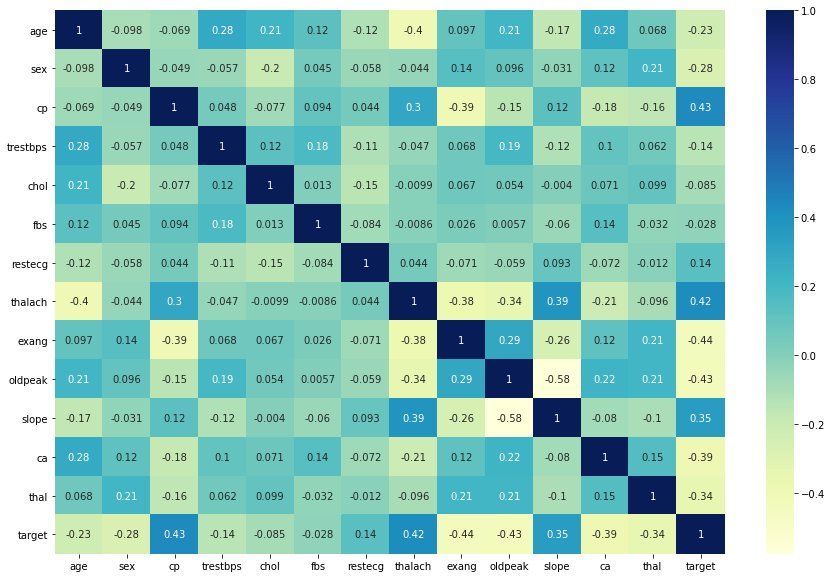

In [22]:
#Visualization will let us read better
plt.figure(figsize = (15, 10))

sns.heatmap(corr_matrix,
           annot=True,
           cmap="YlGnBu");


# Modelling

This time we will model, tune the hyperparameter and follow a proper structure

Previouslly we have seen that Logistic Regression has given us an accuracy of 89%, so now aur target need to me more than that.

Let's aim for 95%

In [23]:
#Before that let's calculate all the model score again, in a more structured manner

Models = {"KNN" : KNeighborsClassifier(),
         "LogisticRegression": LogisticRegression(),
         "RandomForestClassifier":RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in Models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [24]:
model_scores = fit_and_score(Models, X_train, X_test, y_train, y_test)

model_scores

{'KNN': 0.6885245901639344,
 'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8360655737704918}

In [25]:
type(model_scores.items())

dict_items

In [26]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare

,KNN,LogisticRegression,RandomForestClassifier
accuracy,0.688525,0.885246,0.836066


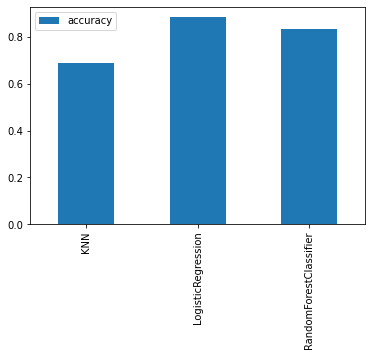

In [27]:
model_compare.T.plot.bar();

In [28]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


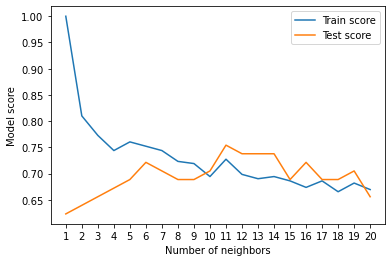

In [29]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

By just simple tweeking we were able to increase the accuracy of the model, but it is still less than Random Forrest.  
So we will drop this

We will use RandomSearchCV to tune parameters

In [30]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [31]:


# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [32]:
#Train LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               param_distributions=log_reg_grid,
                               cv = 5,
                               n_iter=20,
                               verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [35]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
rs_rf.best_params_

In [ ]:
rs_rf.score(X_test, y_test)

#### Now with `GridSearchCV`

In [ ]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)
gs_log_reg.fit(X_train, y_train)
gs_log_reg.best_params_, gs_log_reg.score(X_test, y_test)

In [ ]:
# This code is 3600 times more computationally expensive then the last code,
# it will take many hours hence we are not doing it
# gs_rf = GridSearchCV(RandomForestClassifier(),
#                          param_grid = rf_grid,
#                          cv = 5,
#                          verbose = True)

# gs_rf.fit(X_train, y_train)
# gs_rf.best_params_, gs_rf.score(X_test, y_test)

## Different sorts of evaluation

In [ ]:
# Evalutaion based on GridSearch's best paramter for LogisticRegression

y_preds = gs_log_reg.predict(X_test)
y_preds

In [ ]:
### Import differnt evalution parameters

from sklearn.metrics import roc_auc_score, plot_roc_curve, classification_report, \
confusion_matrix, plot_confusion_matrix

In [ ]:
# the trained data
plot_roc_curve(gs_log_reg, X_train, y_train)

In [ ]:
# the test data, this will give us the clearer picture
plot_roc_curve(gs_log_reg, X_test, y_test)

In [ ]:
plot_confusion_matrix(gs_log_reg, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_preds))

## Training and scoring is done simutaneously 

In [ ]:
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(clf,
                     X,
                     y,
                     cv = 5,
                     scoring = 'accuracy')

cv_acc

In [ ]:
np.mean(cv_acc)

In [ ]:
cv_pre = cross_val_score(clf,
                     X,
                     y,
                     cv = 5,
                     scoring = 'precision')

cv_pre

In [ ]:
cv_recall = cross_val_score(clf,
                     X,
                     y,
                     cv = 5,
                     scoring = 'recall')

cv_recall

In [ ]:
cv_f1 = cross_val_score(clf,
                     X,
                     y,
                     cv = 5,
                     scoring = 'f1')

cv_f1

In [ ]:
cv_metrices1 = pd.DataFrame({'cv_acc' : cv_acc,
                            'cv_f1' : cv_f1,
                            'cv_pre' : cv_pre,
                            'cv_recall' : cv_recall})
cv_metrices1

In [ ]:
# cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
#                             "Precision": cv_pre,
#                             "Recall": cv_recall,
#                             "F1": cv_f1},
#                           index=[0])

# cv_metrics

In [ ]:
cv_metrices = pd.DataFrame([cv_acc, cv_f1, cv_pre, cv_recall], 
                           index=['cv_acc', 'cv_f1', 'cv_pre', 'cv_recall'])
cv_metrices 

In [ ]:
cv_metrices["Average"] = cv_metrices.mean(axis = 1)
cv_metrices

In [ ]:
cv_metrices["Average"].plot.bar()

## Feature Importance

In [ ]:
# clf = RandomForestClassifier()
lr.fit(X_train, y_train)
lr.coef_

In [ ]:
features = pd.DataFrame(data = lr.coef_, columns = X_train.columns)
features.T

In [ ]:
features.plot.bar()

In [ ]:
pd.crosstab(df1['sex'], df1['target'])

This means that women (sex = 0) is more likely to get heart disease.

In [ ]:
df1['cp'].unique()

In [ ]:
pd.crosstab(df1['cp'], df1['target'])

Similarly different parameter have different relation with target
